# Titanic Data Analysis

In this iPython notebook resides some basic analysis performed on the survial data from the [Titanic Data Set](./titanic_data.csv). The analyses include:
- survival based on the gender of the passenger,
- survival based on the passenger's age,
- survival based on the class of tickets purchased by the passengers.

Each analysis contains one basic matplotlib graph to explain its trend.

## Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [3]:
df = pd.read_csv('./titanic_data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Analyzing data

### Basic Common Info

In [146]:
survived = df['Survived'] == 1
df_survived = df[survived]

### Analyzing survival based on gender

(array([233.,   0., 109.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

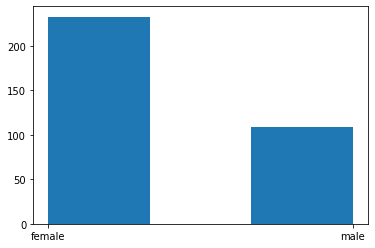

In [147]:
plt.hist(df_survived['Sex'].dropna(), 3)

### Analyzing survival based on age

In [70]:
all_ages = df_survived['Age'].dropna()

In [71]:
all_ages

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 290, dtype: float64

In [120]:
age_categories = []
for age in all_ages:
    if age < 1: age_categories.append('infant')
    elif age >= 1 and age < 13: age_categories.append('pre-teens')
    elif age >= 13 and age < 20: age_categories.append('teenagers')
    elif age >= 20 and age < 60: age_categories.append('adults')
    elif age >= 60: age_categories.append('elderly')

(array([204.,   0.,  39.,   0.,   0.,  33.,   0.,   7.,   0.,   7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

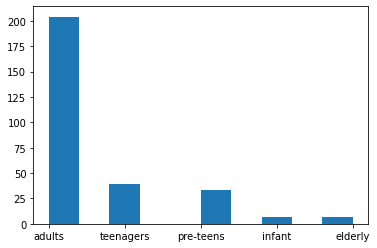

In [122]:
plt.hist(age_categories)

### Analyzing survival based on ticket classes

In [142]:
df_classes = df_survived['Pclass'].map({
    1: 'First class',
    2: 'Second class',
    3: 'Third class'
}).dropna()

(array([136.,   0.,   0.,   0.,   0., 119.,   0.,   0.,   0.,  87.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

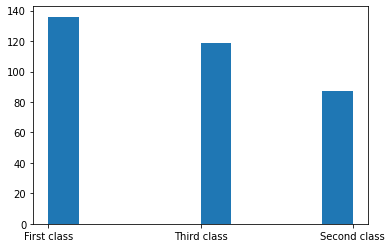

In [143]:
plt.hist(df_classes)